<img src="img/make ai logo.png" width="180" height="360" align="right"/>

### Welcome to the Final Project of Class 1
In this Final Project you will explore and analyze data about House Pricing in Kings County, USA. We know that there are so much variables that can create different prices, such as how many bedrooms, how big living rooms is, and many more. We will explore together, but you should explore more wilder. Do you ready? Let's go !

### Load and Combine Dataset

First of all, we should import package there are needed for analyze data. For now we are using **Pandas**, **Numpy**, **Matplotlib**, and **Seaborn**, don't forget with **Pandas Profiling** too.

In [1]:
# import package that are needed from above
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected = True)
# import pandas_profiling

%matplotlib inline

sns.set(style="whitegrid")

In [2]:
pd.set_option('display.max_columns', None)

After importing the package, of course we need to import dataset itself. Let's import!

In [3]:
# import dataset, dataset name is kc_house_data.csv in folder 'data', named it with 'df'
df = pd.read_csv('kc_house_data.csv')

How is our data after imported? Check it out !

In [4]:
# print first 8 data in the df
df.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


After knowing our data, let's see how many rows and columns in our data.

In [5]:
# how many rows and columns?
df.shape

(21613, 21)

There are much rows and columns, right? Now it's time to check datatype and missing values. Is it any missing values?

In [6]:
# check about datatypes and missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Don't forget with check what column in our data is about. Is it some strange names?

In [7]:
# you know what to do, right?
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

---

### Investigate Our Data

After you have done with import data and know how big your data is, now let's analyze with some statistic data.

Double-click __here__ for the definition for each column.

<!-- Your answer is below:
This is about Housing Prices with many columns, such as:

**id** :
a notation for a house

**date** :
Date house was sold

**price** :
Price is prediction target

**bedrooms** :
Number of Bedrooms/House

**bathrooms** :
Number of bathrooms/House

**sqft_living** :
square footage of the home

**sqft_lot** :
square footage of the lot

**floors** :
Total floors (levels) in house

**waterfront** :
House which has a view to a waterfront

**view** :
Has been viewed

**condition** :
How good the condition is ( Overall )

**grade** :
overall grade given to the housing unit, based on King County grading system

**sqft_above** :
square footage of house apart from basement

**sqft_basement** :
square footage of the basement

**yr_built** :
Built Year

**yr_renovated** :
Year when house was renovated

**zipcode** :
zip

**lat** :
Latitude coordinate

**long** :
Longitude coordinate

**sqft_living15** :
Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15** :
lotSize area in 2015(implies-- some renovations)
-->

In [8]:
# Check statistical value for every column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# For better analysis, check it with Pandas Profiling
# pandas_profiling.ProfileReport(df)

After you get some values, I guess that you are confused with so many numbers inside, and get some e- , so here is solution for changed e- into full number.

In [10]:
pd.set_option('float_format', '{:f}'.format)

Actually when you run code above, you are changing all the numerical value into float and e- into full number.

Check statistical value again.

In [11]:
# Check statistical value again
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4580301520.864988,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312049,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049194.000000,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7308900445.000000,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looks better, right? So, let's find insight so we can get into Domain Knowledge, based on our data in statistic.

Example : 
- In target variable, **price** there are no outlier, but there is some kind more space between **min** and **Q1** than **Q3** and **max** with average of house price is 540,000 but getting median 450,000 . So in some case price is very expensive, some case there are some cheaper price.

Find minimum 5 insight from data.

1. Mencari penyebaran data dan outlier dari index **Bedrooms**

In [12]:
df['bedrooms'].describe()

count   21613.000000
mean        3.370842
std         0.930062
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        33.000000
Name: bedrooms, dtype: float64

In [13]:
#Mencari minimal outlier dan maximal outlier

q1 = df['bedrooms'].quantile([0.25]).values[0]
q3 = df['bedrooms'].quantile([0.75]).values[0]
iqr = q3-q1

min_out = q1 - (1.5*iqr)
max_out = q3 + (1.5*iqr)

print("Mode : ", df['bedrooms'].mode().values[0])
print("Median : ", df['bedrooms'].median())
print("Mean : ", df['bedrooms'].mean())
print("STD : ", df['bedrooms'].std())
print("Data dikatakan outlier apabila data <", min_out,"atau data >", max_out)

out = len(df[df['bedrooms'] > max_out])+len(df[df['bedrooms'] < min_out])

print('Data Outlier sebanyak : ',out,'/',df.shape[0])


Mode :  3
Median :  3.0
Mean :  3.37084162309721
STD :  0.9300618311474632
Data dikatakan outlier apabila data < 1.5 atau data > 5.5
Data Outlier sebanyak :  546 / 21613


In [14]:
data = [go.Box(y=df['bedrooms'],
              name='Data Bedrooms')]
layout = go.Layout(title='Distribution Plot of Coloumn Bedrooms',
                  xaxis=dict(title='Sample Data'),
                  yaxis=dict(title='Distribution'))

fig=go.Figure(data=data, layout=layout)

pyo.iplot(fig)

2. Mencari **sqft_living** berdasarkan banyaknya penyebaran data by bedrooms

In [15]:
df.corr(method='spearman')['bedrooms']

id               0.006250
price            0.344652
bedrooms         1.000000
bathrooms        0.521406
sqft_living      0.647366
sqft_lot         0.216531
floors           0.227541
waterfront      -0.007598
view             0.081421
condition        0.012660
grade            0.380534
sqft_above       0.539704
sqft_basement    0.230496
yr_built         0.180022
yr_renovated     0.016877
zipcode         -0.167186
lat             -0.021185
long             0.191389
sqft_living15    0.443816
sqft_lot15       0.201577
Name: bedrooms, dtype: float64

In [16]:
bed_iqr = df[(df['bedrooms'] >=q1) & (df['bedrooms'] <=q3)][['bedrooms','sqft_living','price']]
bed_iqr.describe()

,bedrooms,sqft_living,price
count,16706.000000,16706.000000,16706.000000
mean,3.411948,2114.308871,535928.466838
std,0.492200,802.385202,331127.087769
min,3.000000,490.000000,82000.000000
25%,3.000000,1530.000000,325000.000000
50%,3.000000,1970.000000,455000.000000
75%,4.000000,2530.000000,648446.250000
max,4.000000,7850.000000,4489000.000000


In [17]:
bed_iqr.corr()

,bedrooms,sqft_living,price
bedrooms,1.000000,0.459338,0.251487
sqft_living,0.459338,1.000000,0.683341
price,0.251487,0.683341,1.000000


In [18]:
trace1 = [go.Box(x=bed_iqr['bedrooms'],
                y=bed_iqr['sqft_living'],
                name='Bedrooms')]

layout = go.Layout(title='Distribution Plot of Coloumn Bedrooms',
                  xaxis=dict(title='Sample Data'),
                  yaxis=dict(title='Distribution'))

fig=go.Figure(data=trace1, layout=layout)

pyo.iplot(fig)

In [19]:
bed_iqr_iqr3 = bed_iqr[bed_iqr['bedrooms']==3]['sqft_living'].quantile([0.75]).values[0] - bed_iqr[bed_iqr['bedrooms']==3]['sqft_living'].quantile([0.25]).values[0]
bed_iqr_max_out3 = bed_iqr[bed_iqr['bedrooms']==3]['sqft_living'].quantile([0.75]).values[0] + (1.5*bed_iqr_iqr3)

bed_iqr_iqr4 = bed_iqr[bed_iqr['bedrooms']==4]['sqft_living'].quantile([0.75]).values[0] - bed_iqr[bed_iqr['bedrooms']==4]['sqft_living'].quantile([0.25]).values[0]
bed_iqr_max_out4 = bed_iqr[bed_iqr['bedrooms']==4]['sqft_living'].quantile([0.75]).values[0] + (1.5*bed_iqr_iqr4)

out_bed_iqr3 = len(bed_iqr[(bed_iqr['bedrooms'] == 3) & (bed_iqr['sqft_living'] > bed_iqr_max_out3)])
out_bed_iqr4 = len(bed_iqr[(bed_iqr['bedrooms'] == 4) & (bed_iqr['sqft_living'] > bed_iqr_max_out4)])

total_out_bed_iqr = out_bed_iqr3 + out_bed_iqr4
total_out_bed_iqr

print('Rumah dengan bedrooms = 3 mempunyai sqft_living upper fence :',bed_iqr_max_out3)
print('Rumah dengan bedrooms = 3 dan mempunyai sqft_living >',bed_iqr_max_out3,':',out_bed_iqr3)
print("")
print('Rumah dengan bedrooms = 4 mempunyai sqft_living upper fence :',bed_iqr_max_out4)
print('Rumah dengan bedrooms = 4 dan mempunyai sqft_living >',bed_iqr_max_out4,':',out_bed_iqr4)
print("")

Rumah dengan bedrooms = 3 mempunyai sqft_living upper fence : 3220.0
Rumah dengan bedrooms = 3 dan mempunyai sqft_living > 3220.0 : 334

Rumah dengan bedrooms = 4 mempunyai sqft_living upper fence : 4518.375
Rumah dengan bedrooms = 4 dan mempunyai sqft_living > 4518.375 : 167



3. berdasarkan korelasi antara 'price' dan 'grade' dapat disimpulkan bahwa, price akan semakin mahal jika grade semakin bagus. Untuk pesebaran data grade rumah paling banyak terdapat antara  6.4814144212054945  sampai  8.832331935154103, dengan data sebesar 15049 dan memiliki rata - rata 459146.370390

In [20]:
df.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

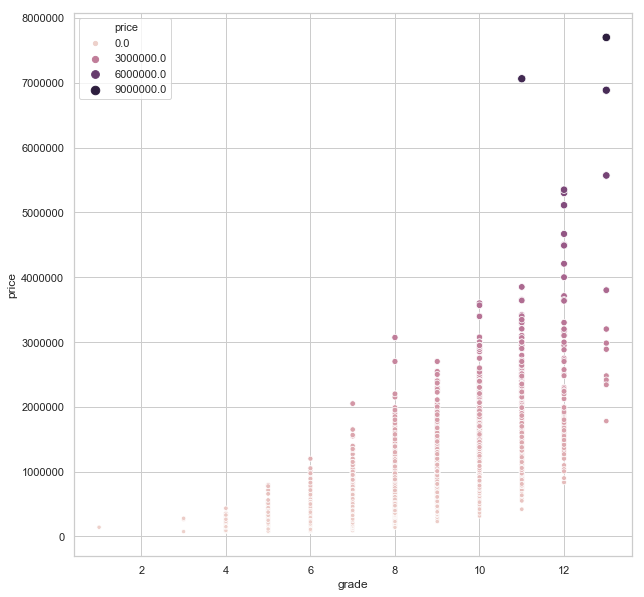

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='grade',y='price',data=df,hue='price',size='price')
plt.show()

In [22]:
df.describe()['grade']

count   21613.000000
mean        7.656873
std         1.175459
min         1.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        13.000000
Name: grade, dtype: float64

In [23]:
grade = [go.Box(y=df['grade'])]

layout = go.Layout(title='Grade Boxplot',
                  yaxis=dict(title='Grade'))

fig=go.Figure(data=grade, layout=layout)

pyo.iplot(fig)

In [24]:
var_min = df['grade'].mean()-df['grade'].std()
var_max = df['grade'].mean()+ df['grade'].std()

print("Persebaran data paling banyak terdapat antara ", var_min," sampai ", var_max)

Persebaran data paling banyak terdapat antara  6.4814144212054945  sampai  8.832331935154103


In [25]:
df[(df['grade'] > var_min) & (df['grade'] < var_max)][['price']].describe()

,price
count,15049.000000
mean,459146.370390
std,195709.717920
min,90000.000000
25%,320000.000000
50%,425000.000000
75%,555000.000000
max,3070000.000000


4. Berdasarkan grafik yang dibuat, dapat disimpulkan bahwa semakin besar grade maka memiliki price yang cukup tinggi pula

In [26]:
df.corr(method='spearman')['grade']

id               0.019835
price            0.658215
bedrooms         0.380534
bathrooms        0.658194
sqft_living      0.716400
sqft_lot         0.152049
floors           0.501684
waterfront       0.062189
view             0.217044
condition       -0.167374
grade            1.000000
sqft_above       0.711815
sqft_basement    0.092927
yr_built         0.500633
yr_renovated     0.016029
zipcode         -0.181552
lat              0.103921
long             0.222791
sqft_living15    0.662635
sqft_lot15       0.156109
Name: grade, dtype: float64

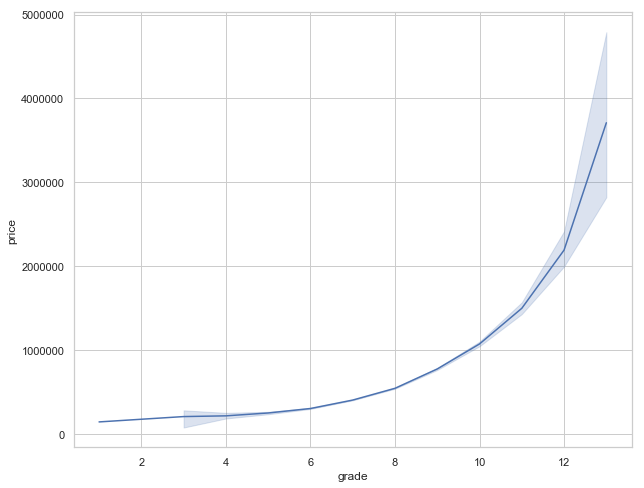

In [27]:
plt.figure(figsize=(10,8))
sns.lineplot(x='grade',y='price',data=df)
plt.show()

5.

In [28]:
df['sqft_living15'].describe()


count   21613.000000
mean     1986.552492
std       685.391304
min       399.000000
25%      1490.000000
50%      1840.000000
75%      2360.000000
max      6210.000000
Name: sqft_living15, dtype: float64

In [29]:
df.corr()['sqft_living15']

id              -0.002901
price            0.585379
bedrooms         0.391638
bathrooms        0.568634
sqft_living      0.756420
sqft_lot         0.144608
floors           0.279885
waterfront       0.086463
view             0.280439
condition       -0.092824
grade            0.713202
sqft_above       0.731870
sqft_basement    0.200355
yr_built         0.326229
yr_renovated    -0.002673
zipcode         -0.279033
lat              0.048858
long             0.334605
sqft_living15    1.000000
sqft_lot15       0.183192
Name: sqft_living15, dtype: float64

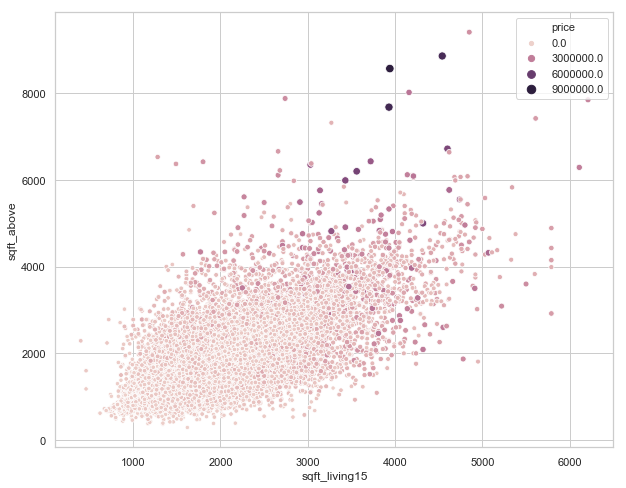

In [30]:
plt.figure(figsize=(10,8))

sns.scatterplot(x='sqft_living15',y='sqft_above',data=df,hue='price',size='price')
plt.show()

Do you find many insight? I hope so, since that there are so many thing to explore about.

After finding insight, now it's time to analyze each columns you need to understand, but first you can drop many columns that no need to analyze.

In [31]:
df = df.drop(['id','date','zipcode','lat','long'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,2720,8062
3,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,1800,7503


After removed 5 columns, so there are still much columns to understand, right?

Maybe before we analyze each column, better if we check correlation from each columns and target itself.

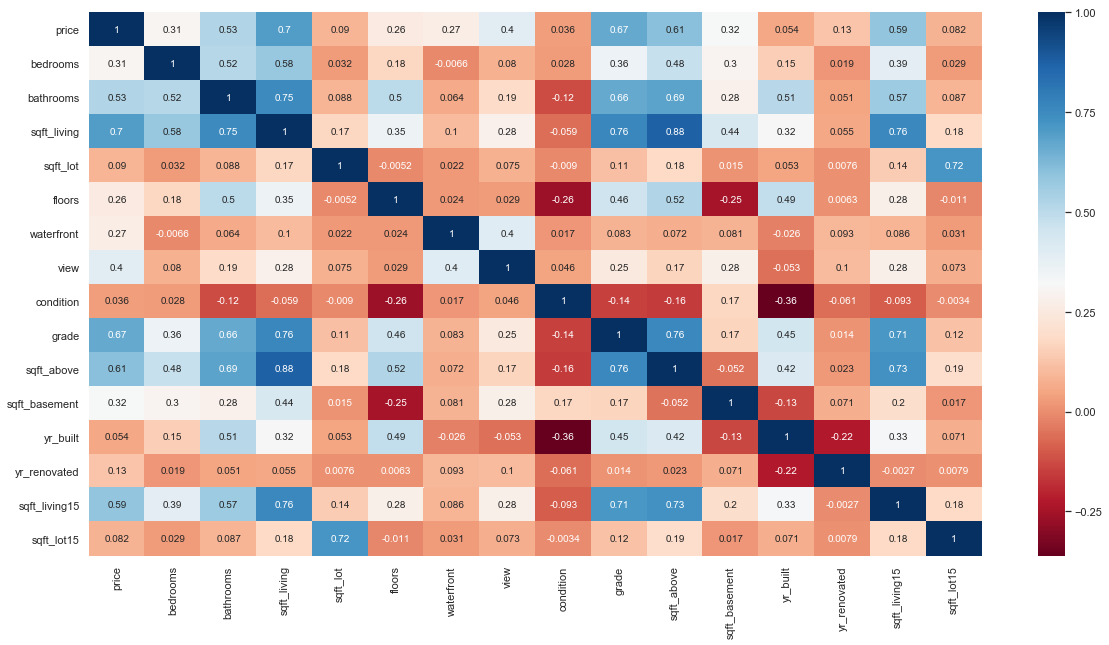

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

Did you find any pattern of that color? Or you get some interesting insight?

In [33]:
# Type here

#1. Berdasarkan tabel korelasi yang dibuat, kondisi rumah merupakan salah satu fitur yang paling tidak berpengaruuh dalam menentukan harga rumah

#2. Berdasarkan tabel korelasi, fitur yang memiliki korelasi paling tinggi adalah lebar luas rumah (sqft_living) mempengaruhi luas bangunan di atasnya (sqft_above)

After you check correlation, it's time to check every columns and maybe you can get another insight.

##### Example

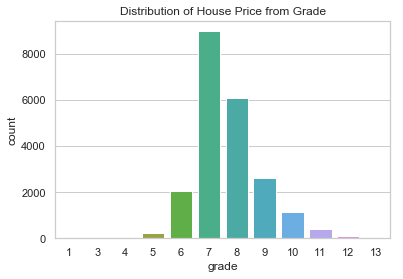

In [34]:
ax = sns.countplot(x='grade', data=df)
#ax.set_yscale('log')
plt.title('Distribution of House Price from Grade')
plt.show()

###### Explanation :
From this visualization we can get information, that the most house is in **Grade 7**, while grade is from 1 until 13.

We still don't know if :
- more number in grade means more expensive or
- less number means more expensive. 

So let's find out.

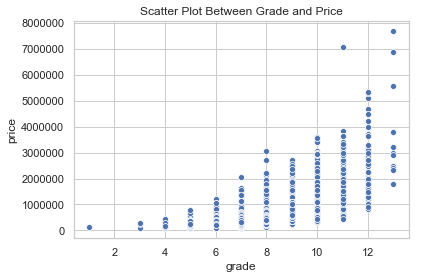

In [35]:
sns.scatterplot(x='grade', y='price', data=df)
plt.title('Scatter Plot Between Grade and Price')
plt.show()

The answer is, no, whil actually the correlation is slightly positive but, in some case when price is 100,000 there are in grade 6 until 12. So it doesn't mean that *more grade equals more price.*

Now it's your turn to analyze with your sense. Let's do it.

In [36]:
# Type your answer here
df.corr()['sqft_living']

price            0.702035
bedrooms         0.576671
bathrooms        0.754665
sqft_living      1.000000
sqft_lot         0.172826
floors           0.353949
waterfront       0.103818
view             0.284611
condition       -0.058753
grade            0.762704
sqft_above       0.876597
sqft_basement    0.435043
yr_built         0.318049
yr_renovated     0.055363
sqft_living15    0.756420
sqft_lot15       0.183286
Name: sqft_living, dtype: float64

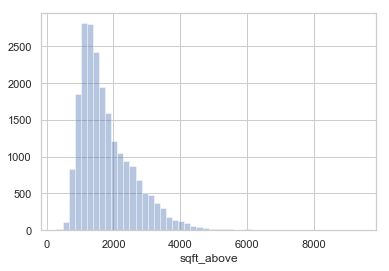

In [37]:
sns.distplot(df['sqft_above'],kde=False);

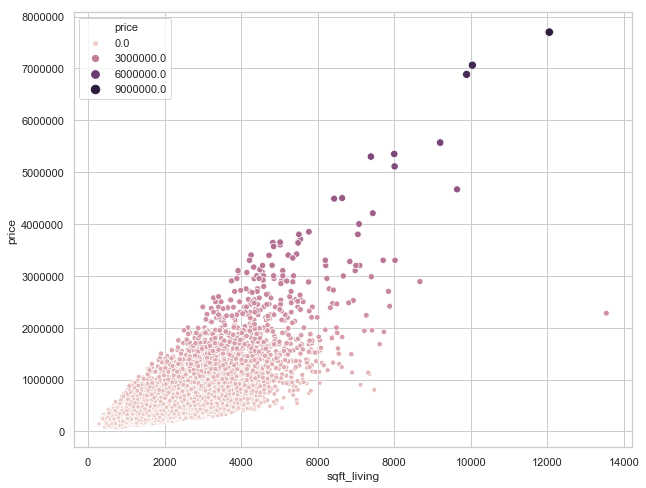

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='sqft_living',y='price',data=df,size='price',hue='price')
plt.show()

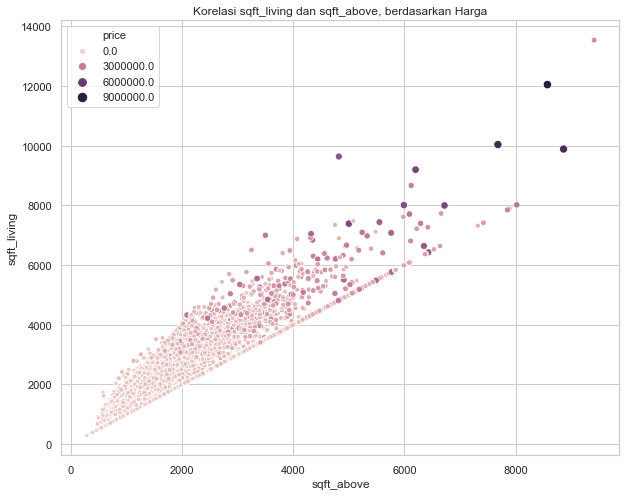

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['sqft_above'],df['sqft_living'],data=df,size='price',hue='price')
plt.title('Korelasi sqft_living dan sqft_above, berdasarkan Harga')
plt.show()

### Find Categorical and Numerical

If you find some unusual visualization above, it means that you are not separate between data **categorical** and **numerical**.

Remembered it? Yeah, while in some visualization is using categorical data only, numerical data only, or both of them.

Let's divide them into categorical and numerical. What columns is categorical and what kind is numerical?
- data_cat for data categorical
- data_num for data numerical

In [40]:
# Type here for answer
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,2720,8062
3,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,1800,7503


In [41]:
data_cat = df[['bedrooms','waterfront','view','condition','grade']]
data_cat.head()

,bedrooms,waterfront,view,condition,grade
0,3,0,0,3,7
1,3,0,0,3,7
2,2,0,0,3,6
3,4,0,0,5,7
4,3,0,0,3,8


In [42]:
data_num = df.drop(data_cat.columns, axis=1)
data_num.head()

,price,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.000000,1.000000,1180,5650,1.000000,1180,0,1955,0,1340,5650
1,538000.000000,2.250000,2570,7242,2.000000,2170,400,1951,1991,1690,7639
2,180000.000000,1.000000,770,10000,1.000000,770,0,1933,0,2720,8062
3,604000.000000,3.000000,1960,5000,1.000000,1050,910,1965,0,1360,5000
4,510000.000000,2.000000,1680,8080,1.000000,1680,0,1987,0,1800,7503


#### Numerical Data Normalization
It's your turn to normalize your data for better understanding of it. Now it's numerical time.

In [43]:
# Type here for normalize
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

df_norm_num = min_max.fit_transform(data_num)
df_norm_num = pd.DataFrame(df_norm_num, columns=data_num.columns)
df_norm_num.head()

C:\Users\rifqipambudhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



,price,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.019266,0.125000,0.067170,0.003108,0.000000,0.097588,0.000000,0.478261,0.000000,0.161934,0.005742
1,0.060721,0.281250,0.172075,0.004072,0.400000,0.206140,0.082988,0.443478,0.988089,0.222165,0.008027
2,0.013770,0.125000,0.036226,0.005743,0.000000,0.052632,0.000000,0.286957,0.000000,0.399415,0.008513
3,0.069377,0.375000,0.126038,0.002714,0.000000,0.083333,0.188797,0.565217,0.000000,0.165376,0.004996
4,0.057049,0.250000,0.104906,0.004579,0.000000,0.152412,0.000000,0.756522,0.000000,0.241094,0.007871


#### Categorical Data Normalization
Now for categorical data, let's normalize it !

In [44]:
# Type here for normalize
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [45]:
length = data_cat.shape[1]
colo = data_cat.columns

for i in range(length):
    a = label_encoder.fit_transform(data_cat.iloc[:,i])
    a = pd.DataFrame(a, columns=[colo[i]+' new'])
    data_cat = data_cat.join(a)

In [46]:
data_cat.head()

,bedrooms,waterfront,view,condition,grade,bedrooms new,waterfront new,view new,condition new,grade new
0,3,0,0,3,7,3,0,0,2,5
1,3,0,0,3,7,3,0,0,2,5
2,2,0,0,3,6,2,0,0,2,4
3,4,0,0,5,7,4,0,0,4,5
4,3,0,0,3,8,3,0,0,2,6


#### Combined and Save Your Data

After you normalize categorical and numerical, don't forget to combined all of your data and save it into csv format file.

In [47]:
# Type here
data_comb = data_num.copy()
data_comb = data_comb.join(data_cat[['bedrooms new','waterfront new','view new','condition new','grade new']])

In [48]:
data_comb.head()

,price,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms new,waterfront new,view new,condition new,grade new
0,221900.000000,1.000000,1180,5650,1.000000,1180,0,1955,0,1340,5650,3,0,0,2,5
1,538000.000000,2.250000,2570,7242,2.000000,2170,400,1951,1991,1690,7639,3,0,0,2,5
2,180000.000000,1.000000,770,10000,1.000000,770,0,1933,0,2720,8062,2,0,0,2,4
3,604000.000000,3.000000,1960,5000,1.000000,1050,910,1965,0,1360,5000,4,0,0,4,5
4,510000.000000,2.000000,1680,8080,1.000000,1680,0,1987,0,1800,7503,3,0,0,2,6


In [49]:
data_comb.to_csv('Project_Question.csv',index=False)

### Linear Model

Define what is your $x$ and $y$ and split into training and testing split.
For :
- One variable $x$
- Many variable $x$
- All variable $x$

In [100]:
# Type here
data_comb.corr(method='spearman')[['sqft_living']]

,sqft_living
price,0.644191
bathrooms,0.745526
sqft_living,1.000000
sqft_lot,0.304159
floors,0.401267
sqft_above,0.843504
sqft_basement,0.327878
yr_built,0.352421
yr_renovated,0.052679
sqft_living15,0.746982


In [65]:
from sklearn.model_selection import train_test_split

x_one = data_comb[['sqft_above']]  #dipilih berdasarkan korelasi terbesar
x_many = data_comb[['price','sqft_above','bathrooms','sqft_living15']]  #dipilih berdasarkan korelasi top4 terbesar
x_all = data_comb.drop('sqft_living',axis=1)
y = data_comb['sqft_living']

In [68]:
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(x_one,y, test_size = 0.25, random_state = 45)
X_many_train, X_many_test, y_many_train, y_many_test = train_test_split(x_many,y, test_size = 0.25, random_state = 45)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(x_all,y, test_size = 0.25, random_state = 45)

After that, define function for Linear Model, fit and predict

In [71]:
from sklearn.linear_model import LinearRegression
reg_one = LinearRegression()
reg_many = LinearRegression()
reg_all = LinearRegression()

In [72]:
reg_one.fit(X_one_train, y_one_train)
reg_many.fit(X_many_train, y_many_train)
reg_all.fit(X_all_train, y_all_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
pred_one = reg_one.predict(X_one_test)
pred_many = reg_many.predict(X_many_test)
pred_all = reg_all.predict(X_all_test)

In [80]:
hasil_one = pd.DataFrame({'y_test':y_one_test,
                         'y_pred':pred_one})

hasil_many = pd.DataFrame({'y_test':y_many_test,
                         'y_pred':pred_many})

hasil_all = pd.DataFrame({'y_test':y_all_test,
                         'y_pred':pred_all})

## One Variable X

In [87]:
hasil_one.head()

,y_test,y_pred
17055,2710,2977.803230
2488,1540,1839.536443
1808,2720,2987.532006
10638,2020,1654.689700
9172,2660,2111.942170


## Many Variable X

In [89]:
hasil_many.head()

,y_test,y_pred
17055,2710,2878.524035
2488,1540,1784.317641
1808,2720,3009.012708
10638,2020,1946.368347
9172,2660,2759.719993


## All Variable X

In [91]:
hasil_all.head()

,y_test,y_pred
17055,2710,2710.000000
2488,1540,1540.000000
1808,2720,2720.000000
10638,2020,2020.000000
9172,2660,2660.000000


Get the formula for each model and score of them.

**Example**:
price = 10 * grade + 5 * condition

In [137]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

acc_one = r2_score(pred_one,y_one_test)
acc_many = r2_score(pred_many,y_many_test)
acc_all = r2_score(pred_all,y_all_test)

## Formula One Variable X

In [104]:
print('sqft_living =', '(',reg_one.coef_[0], '*', x_one.columns[0], ') +',reg_one.intercept_ )

sqft_living = ( 0.9728775954916519 * sqft_above ) + 341.30494612797884


In [138]:
print('Dengan R_Square :',acc_one)
print('Dengan MSE :', mean_squared_error(pred_one, y_one_test))
print('Dengan MASE :',mean_absolute_error(pred_one, y_one_test))

Dengan R_Square : 0.7131683674225404
Dengan MSE : 195701.99626666293
Dengan MASE : 358.01650213327866


## Formula Many Variable X

In [133]:
rumus = ''
for i in range(x_many.shape[1]):
    rumus = rumus + ' (' + str(reg_many.coef_[i]) + ' * ' + x_many.columns[i] + ') +'
print('sqft_living =',rumus, reg_many.intercept_)

sqft_living =  (0.0004964920291242683 * price) + (0.5376208894458195 * sqft_above) + (272.64709229189646 * bathrooms) + (0.2091102208230312 * sqft_living15) + -140.77148574792818


In [139]:
print('Dengan R_Square :',acc_many)
print('Dengan MSE :', mean_squared_error(pred_many, y_many_test))
print('Dengan MASE :',mean_absolute_error(pred_many, y_many_test))

Dengan R_Square : 0.832004326644037
Dengan MSE : 125582.48816070372
Dengan MASE : 263.0340243818778


## Formula All Variable X

In [135]:
# Type here
rumus = ''
for i in range(x_all.shape[1]):
    rumus = rumus + ' (' + str(reg_all.coef_[i]) + ' * ' + x_all.columns[i] + ') +'
print('sqft_living =',rumus, reg_all.intercept_)

sqft_living =  (-6.5391568842125895e-18 * price) + (4.779954210221149e-12 * bathrooms) + (8.326672684688674e-17 * sqft_lot) + (-3.441337104807796e-13 * floors) + (1.0000000000000009 * sqft_above) + (1.0000000000000007 * sqft_basement) + (3.516325143386456e-15 * yr_built) + (-4.0158848468863084e-16 * yr_renovated) + (1.7694179454963432e-16 * sqft_living15) + (-4.163336342344337e-17 * sqft_lot15) + (-6.557146318975082e-15 * bedrooms new) + (2.4421937172465637e-13 * waterfront new) + (1.4594750375688387e-15 * view new) + (-3.041848520674527e-15 * condition new) + (-1.18700622248058e-14 * grade new) + -1.5916157281026244e-11


In [140]:
print('Dengan R_Square :',acc_all)
print('Dengan MSE :', mean_squared_error(pred_all, y_all_test))
print('Dengan MASE :',mean_absolute_error(pred_all, y_all_test))

Dengan R_Square : 1.0
Dengan MSE : 2.008292598200332e-23
Dengan MASE : 3.140903936313337e-12


### Conclusion
After you are working with this data, what is your conclusion?

Kesimpulan dari pengerjaan Study Case Beginner ini adalah penggunaan fitur dengan korelasi yang memiliki nilai tertinggi dapat menghasilkan akurasi semakin tinggi, semakin banyak attribut yang memiliki korelasi yang tinggi maka akan tinggi pula hasil R_Square. Dan juga melakukan normalisasi pada suatu data yang memiliki outlier yang cukup besar berpengaruh juga dalam meningkatkan hasil korelasi.